In [99]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy import signal,stats

from sklearn.decomposition import FastICA, PCA
from sklearn.datasets import fetch_olivetti_faces

Load data set of faces images.

In [3]:
images = fetch_olivetti_faces()

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /Users/isabeau/scikit_learn_data


Viewing on of the faces to have an impression of what our dataset is like.

In [9]:
def show(img):
    plt.imshow(img, cm.gray, interpolation="none")
    plt.show()

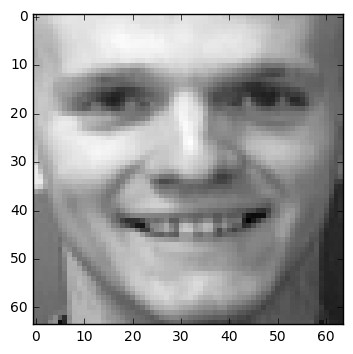

In [23]:
show(images.images[41])

We will now cut up the images of the faces into patches of 16x16

In [31]:
patches = []
for img in images.images:
    for ix in range(0,48,4):
        for iy in range(0,48,4):
            patches.append(img[ix:ix+16, iy:iy+16])

In [32]:
len(patches)

57600

We now apply ICA to the Patches.

In [33]:
#Use 100 top components, using all components would be 16x16 = 256 components
ica = FastICA(n_components=100)

In [34]:
#We need to flatten the patches
flat_patches = np.array(patches).reshape((len(patches), 16*16))

In [92]:
#We now fit ICA to the flattend patches
Decomposition = ica.fit_transform(flat_patches)

Plot the 100 components

In [93]:
def plot_100_components(components):
    import matplotlib.gridspec as gridspec
    #fig, axs = plt.subplots(10,10)
    plt.figure(figsize = (10,10))
    gs1 = gridspec.GridSpec(10, 10)
    gs1.update(wspace=0.0, hspace=0.00)
    for ix in range(10):
        for iy in range(10):
            ax = plt.subplot(gs1[ix+10*iy])
            ax.imshow(components[ix+10*iy].reshape((16,16)), cm.gray, interpolation="none")
            ax.axis('off')
            ax.set_aspect('equal')
            

    #fig.suptitle('ICA components', fontsize=20)
    # Make space for title
    #plt.subplots_adjust(top=0.85)
    plt.show()

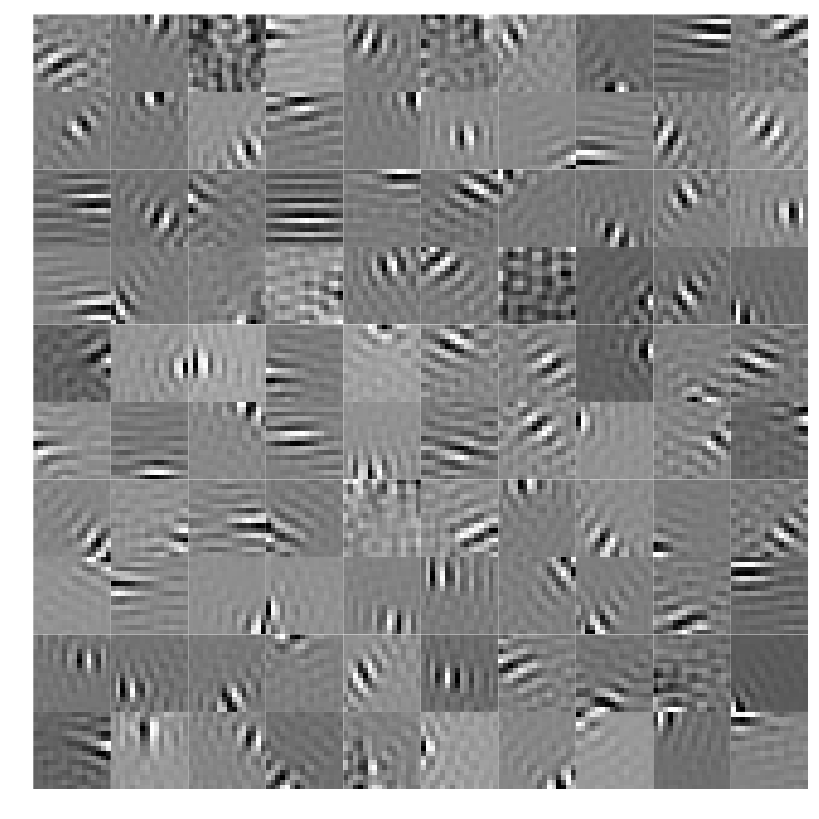

In [94]:
plot_100_components(ica.components_)

Plot the Histograms of the activations of each component.

In [95]:
def plot_100_histograms(decomposition):
    import matplotlib.gridspec as gridspec
    #fig, axs = plt.subplots(10,10)
    plt.figure(figsize = (10,10))
    gs1 = gridspec.GridSpec(10, 10)
    gs1.update(wspace=0.0, hspace=0.00)
    for ix in range(10):
        for iy in range(10):
            ax = plt.subplot(gs1[ix+10*iy])
            ax.hist(decomposition[:,ix+10*iy], 50, normed=1, facecolor='green', alpha=0.75)
            ax.axis('off')
            #ax.set_aspect('equal')
            

    #fig.suptitle('ICA components', fontsize=20)
    # Make space for title
    #plt.subplots_adjust(top=0.85)
    plt.show()

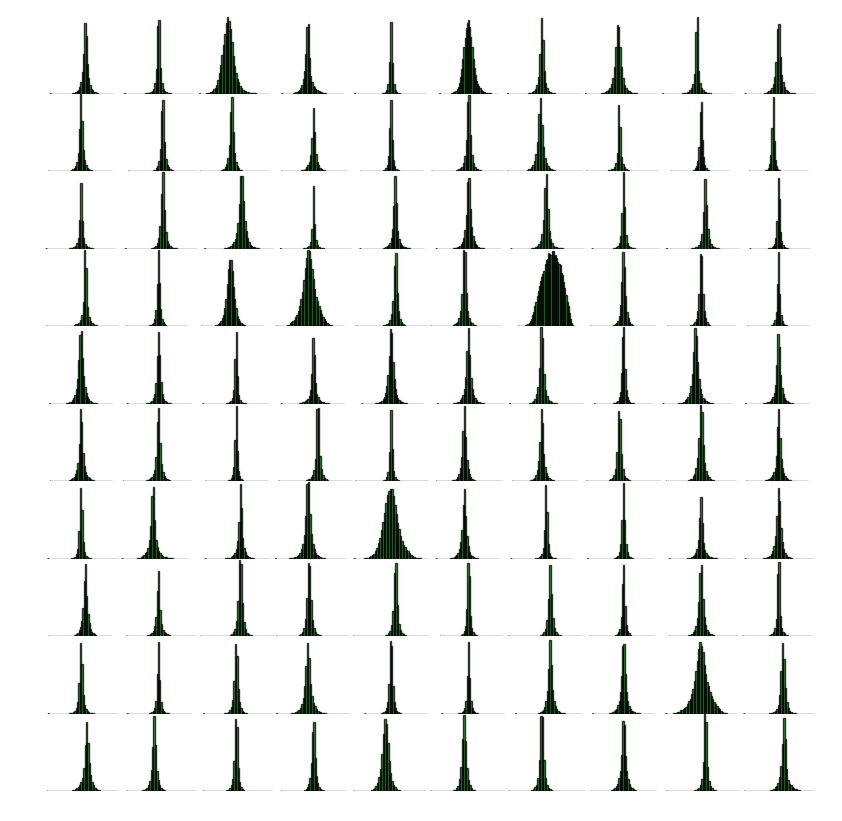

In [96]:
plot_100_histograms(Decomposition)

Calculate Kurtosis

In [103]:
kurtosis = []
for i in range(Decomposition.shape[1]):
    kurtosis.append(stats.kurtosis(Decomposition[:,i]))
kurtosis = np.array(kurtosis)

In [104]:
kurtosis

array([  5.63512415,  11.62933285,   1.9763598 ,   3.98440054,
        15.51830585,   1.58830079,   9.82070726,   5.02998117,
         9.41285981,   5.52511971,   8.05646258,   9.87377357,
         8.885232  ,   6.10996036,  11.37644736,   9.68444657,
         5.12189725,   8.66653354,  10.40941256,  12.31841004,
         8.32630338,  10.08046038,   4.56792474,  10.68258646,
         5.57035064,   5.72479955,   7.74998478,  11.46147366,
         8.89680045,  11.04198084,   7.96693567,  10.43457012,
         2.42582147,   0.79211317,   9.50387445,   8.54336994,
        -0.55531257,   7.29721194,   8.75946143,  14.33429244,
         4.78755223,   9.10944866,  15.79257602,   6.55486228,
         4.72319034,   5.78886893,   6.9653102 ,   9.50038512,
         4.34250992,   6.10759615,   4.75779196,   7.33402739,
        12.51176688,   7.95600247,  13.96801848,   5.27358243,
         6.28905477,  11.42504597,   5.57821611,   4.59875079,
        12.29312713,   4.81519933,   5.71181549,   5.09

In [105]:
kurtosis.mean()

7.9299791244919415

In [107]:
np.median(kurtosis)

8.0116991242617779

In [108]:
kurtosis.max()

15.792576018329793

In [109]:
kurtosis.min()

-0.55531256538991025